<a href="https://colab.research.google.com/github/MarkMburu/GANS-pyconke/blob/main/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative Adversarial Networks with Python**

---
## Outline:

### 1.  Introduction:

  *   ***What is Generative Adversarial Network(GAN)*** 
  *  ***Understand the difference between generative and discriminative models.***

---
\


### 2.   Application Survey:

  *   ***What are GANS good for?***
  *  ***Identify problems that GANs can solve.***
 

---
\


### 3.   Deep-dive:

  *   ***Metrics***
  *  ***Understand the roles of the generator and discriminator in a GAN system.***
  * ***Understand the advantages and disadvantages of common GAN loss functions.***
  *   ***Self-Attention GAN***
  * ***Identify possible solutions to common problems with GAN training.***

---

\

### 4. Examples:

    *   Image uncropping
    *   Generating musical notes
    *   Variation in Microscope image
    *   MNIST generation using GAN

---

\

### 5.   How To get Started and further Reading/References:

  *   How to train a GAN using TFGAN
  *   Research Papers
  *   Github Projects(open source)

---

\























## What is Generative Adversarial Network(GAN)

**Generative --> means that there is a network that is constantly generating new data.**

**Adversarial --> means that it involves two networks opposing each other.**
**bold text**

**Network --> means an order of data that is going ahead and generate new data.**

*GANs consists of two networks, a Generator G(x), and a Discriminator D(x). They both play an adversarial game where the generator tries to fool the discriminator by generating data similar to those in the training set. The Discriminator tries not to be fooled by identifying fake data from real data. They both work simultaneously to learn and train complex data like audio, video or image files.* 



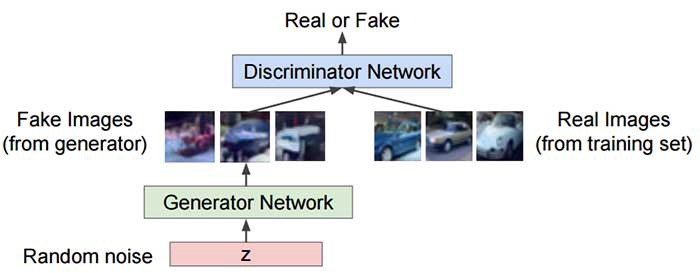
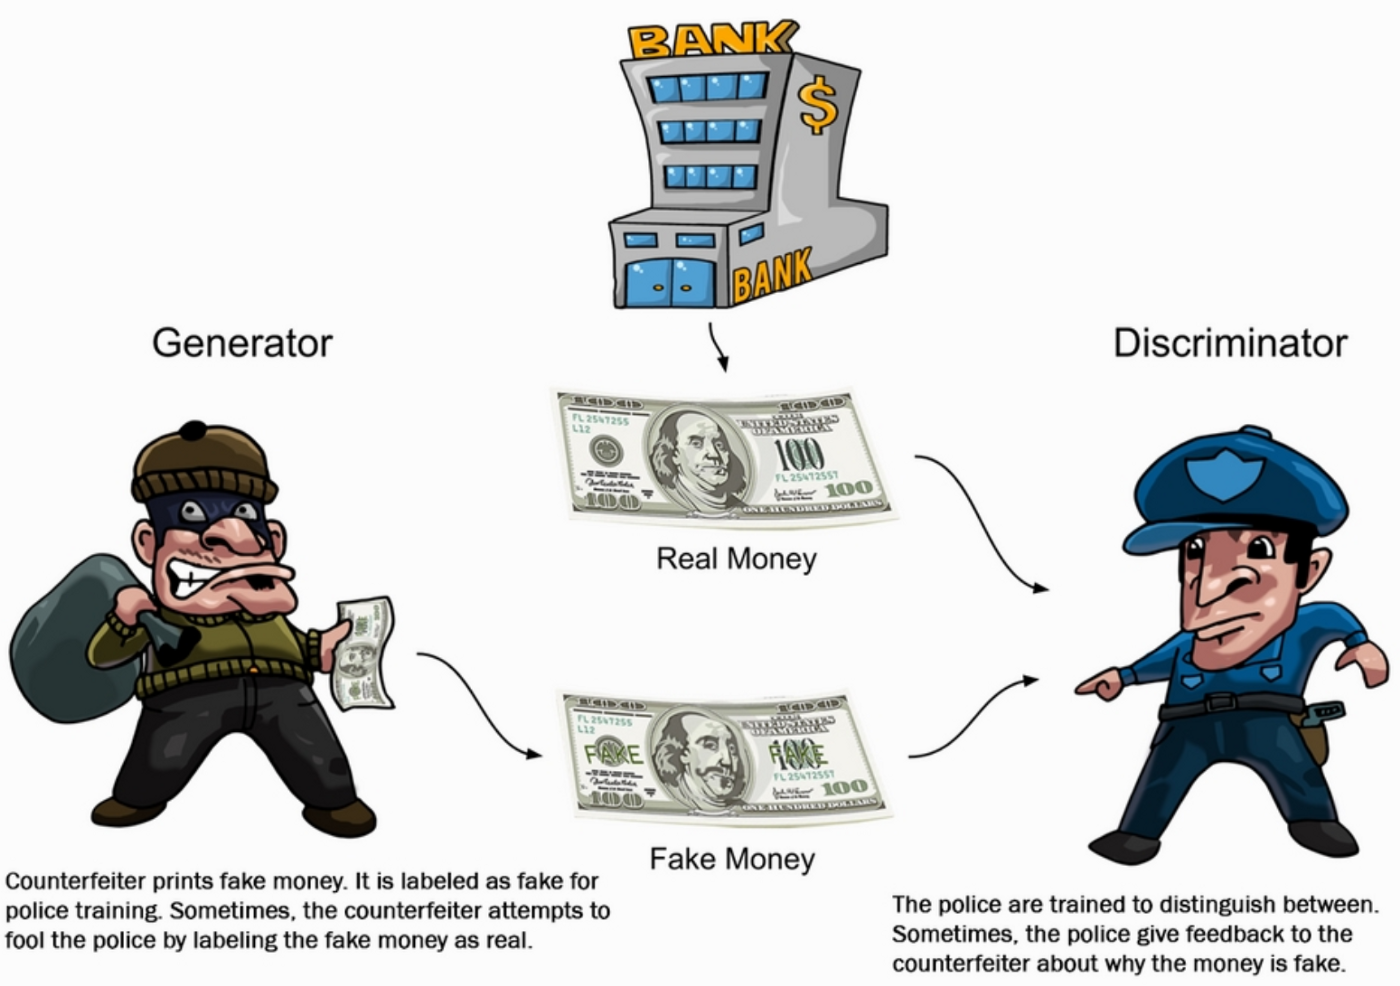

## What are GANS good for?
* image generation
* video generation 
* voice generation.

## Understand the difference between generative and discriminative models.

**Discriminator --> The role is to distinguish between actual and generated (fake) data.**

**Generator --> The role is to create data in such a way that it can fool the discriminator.**

*The generator model generates images from random noise(z) and then learns how to generate realistic images. Random noise which is input is sampled using uniform or normal distribution and then it is fed into the generator which generates an image. The generator output which are fake images and the real images from the training set is fed into the discriminator that learns how to differentiate fake images from real images. The output D(x) is the probability that the input is real. If the input is real, D(x) would be 1 and if it is generated, D(x) should be 0.*

## The math behind the GANs
1. A generative model is a statistical model of the joint probability distribution P(X,Y) on given observable variable X and target variable Y. So:
      

    1.    P(X,Y) = P(X|Y)P(Y)
    2.    P(X,Y) = P(Y|X)P(X)
    3.    P(Y|X) = P(X,Y)/P(X)

common example is Naive Bayes model.

2. A discriminative model is a model of the conditional probability P(Y\mid X=x) of the target Y, given an observation x. common examples are linear regression,logistic regression e.t.c

Most common advantage of generative model over discriminative model is we can make new instance of data because in this case its learning the distribution function of the data itself.

These two models work in an adversary setup.

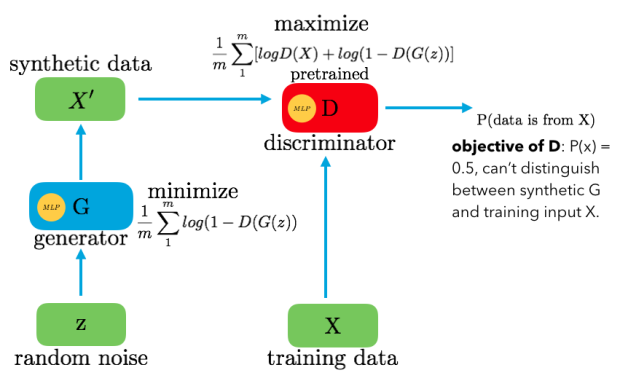

The Discriminator and Generator play a two-player minimax game with the value function V(G, D).

Generator wants to minimize log(1-D(G(z)) when the value of D(G(z)) is high then D will assume that G(z) is nothing but X and this makes 1-D(G(z)) very low and we want to minimize it which this even lower. 

For the Discriminator, we want to maximize D(X) and (1-D(G(z))). So the optimal state of D will be P(x)=0.5. However, we want to train the generator G such that it will produce the results for the discriminator D so that D won’t be able to distinguish between z and X.

This results in a minimax function the Discriminator tries to maximize the objective which is V while the Generator tries to minimize it, due to this minimizing/maximizing we get the minimax term. They both learn together by alternating gradient descent.



## Derivation of the loss function
binary cross entropy
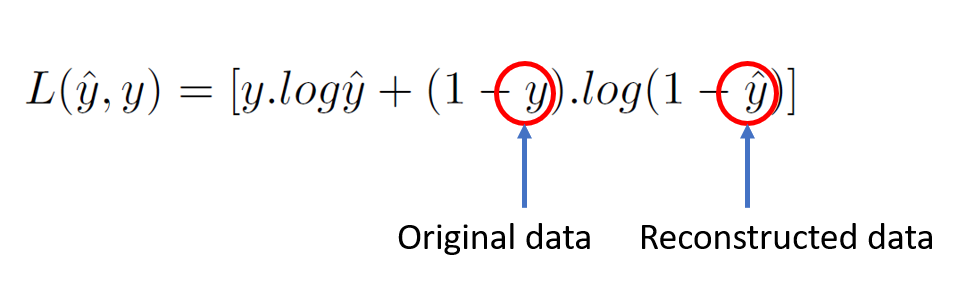

Substituting  the data comming from the discriminator which is  y = 1 and y^ = D(x) we will get:

    L(Dx,1) = log(Dx) ---- equation(i)

Substituting  the data comming from the geneartor which is  y = 0 and y^ = D(G(z)) we will get:
     
    L(D(G(z)),0) = log(1 - D(G(z))) --- equation(ii)

###Discriminator loss

The objective of the discriminator is to correctly classify the fake and real dataset. For this, equations (i) and (ii) should be maximized and final loss function for the discriminator can be given as:

    L = max[log(Dx) + log(1 - D(G(z)))] ---- equation(iii)

###Generator loss
The generator is competing against discriminator. So, it will try to minimize the equation (iii) and loss function is given as:

    L = min[log(Dx) + log(1 - D(G(z)))] ----- equation(iv)

###Combined loss function
    L = min(G)max(D)[log(Dx) + log(1 - D(G(z)))] ----(v)

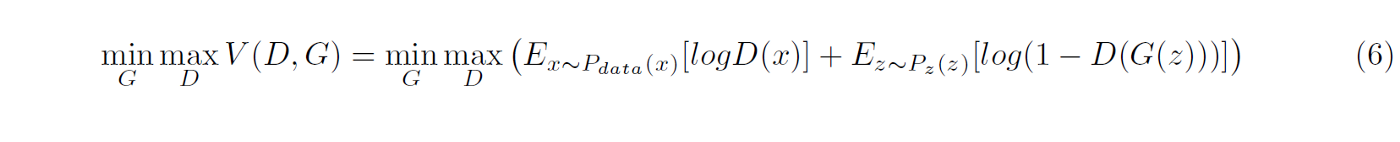

Real data and fake data are inserted into the discriminator with correct labels and training takes place. Gradients are propagated keeping generator fixed. Also, we update the discriminator by ascending its stochastic gradient because for discriminator we want to maximize the loss function given in equation (6).

On the other hand, we update the generator by keeping discriminator fixed and passing fake data with fake labels in order to fool the discriminator. Here, we update the generator by descending its stochastic gradient because for the generator we want to minimize the loss function given in equation (6).

## pseudo-code which shows how GANs are trained.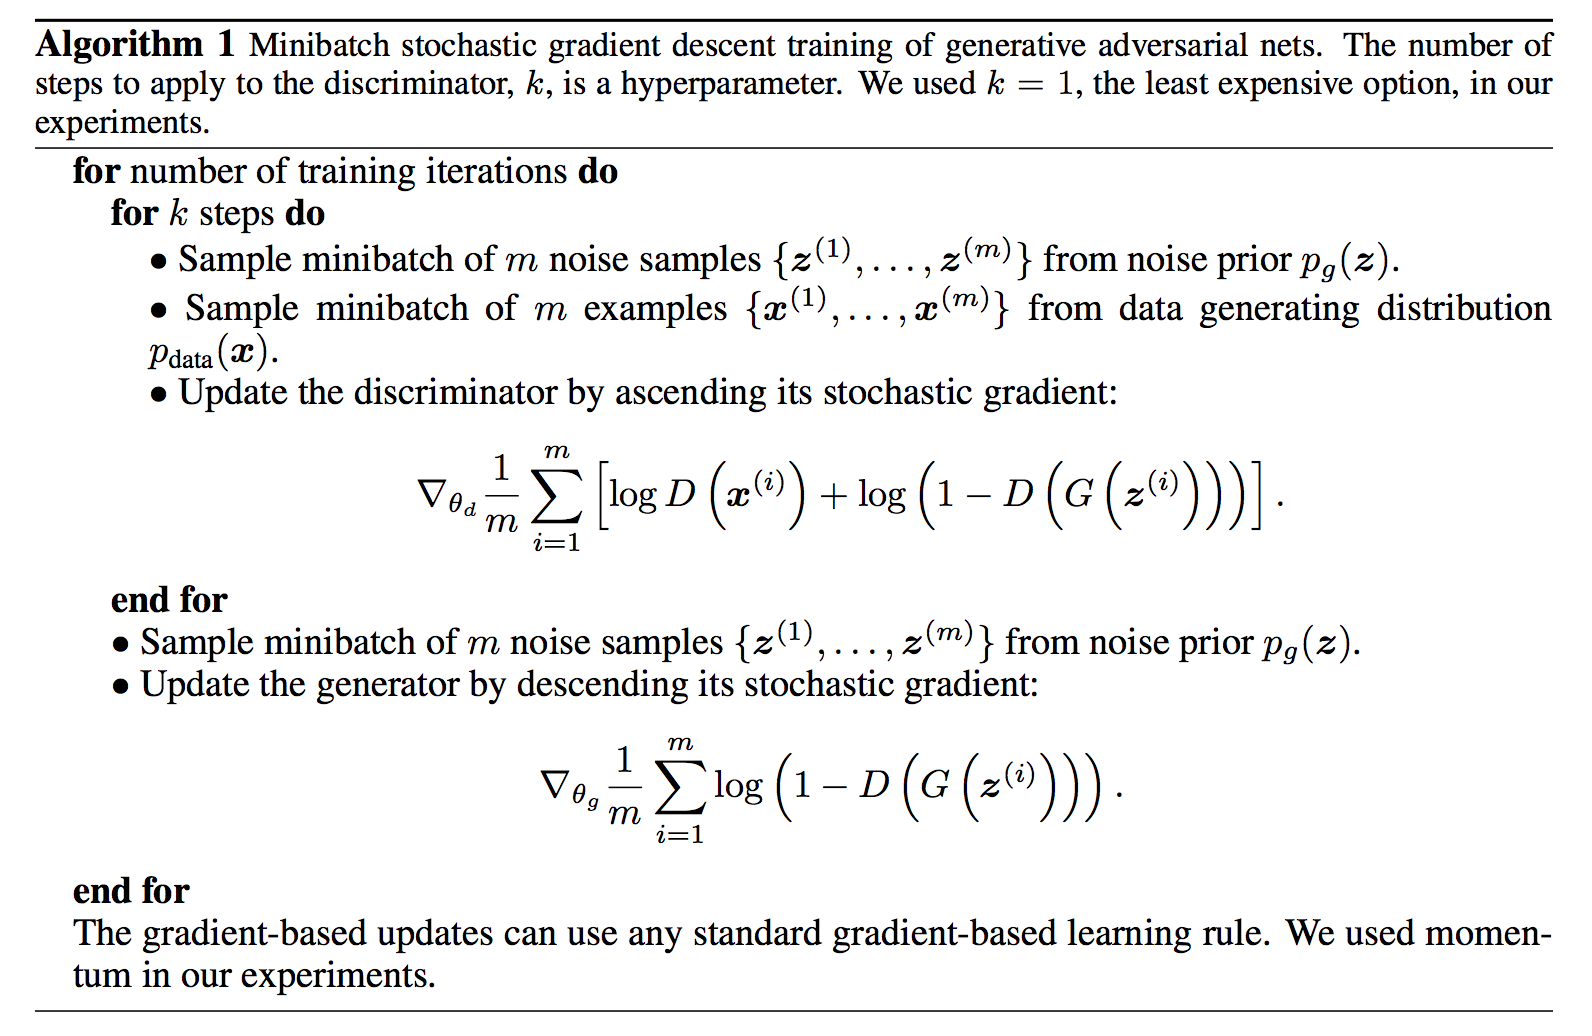

### Global Optimality of Pg = Pdata

The optimal discriminator D for any given generator G can be found by taking derivative of the loss function (equation (6)),
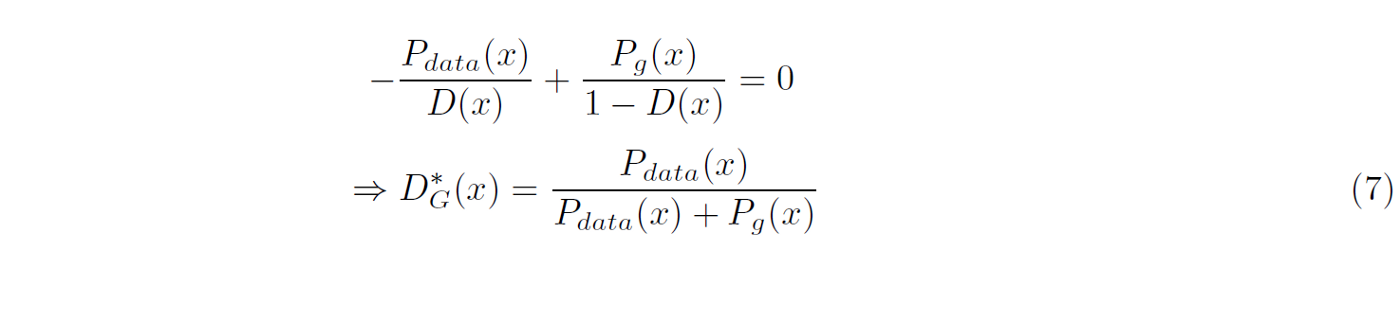


The above equation is very important mathematically but in reality, you cannot calculate optimal D as Pdata(x) is not known. Now, the loss for G when we have optimal D can be obtained by substituting equation (7) into loss function as,
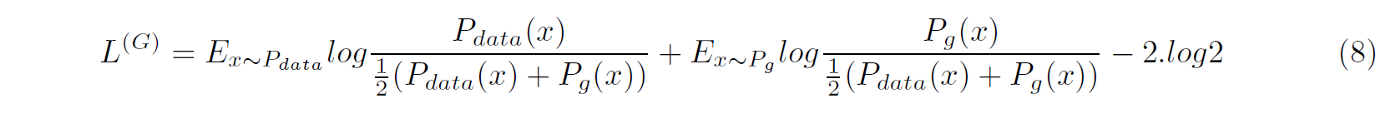

Now, Kullback-Leibler(KL) and Jensen-Shannon(JS) divergences are given by,

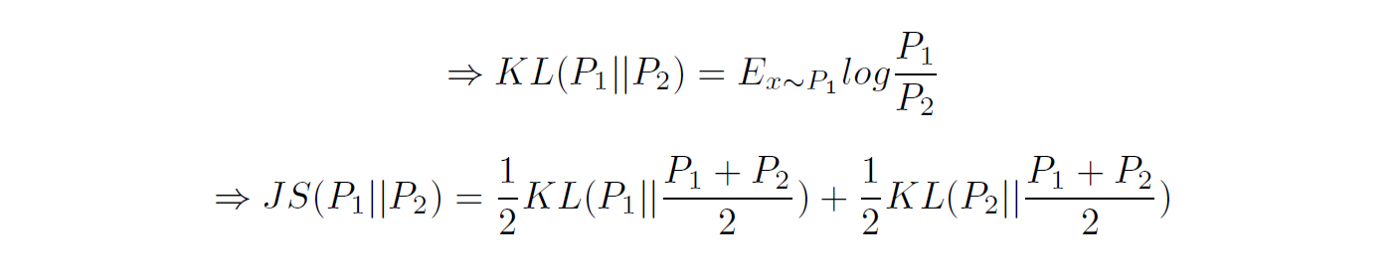
Hence,
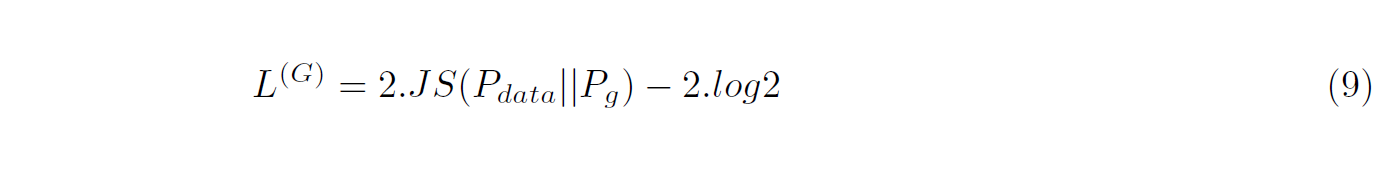

The above equation reduces to -2log2 as the Pg approaches Pdata because divergence becomes zero.

## Limitations


### 1.   Vanishing Gradient:
The gradient is non-zero only when Pg and Pr have a significant overlap that means when D is close to optimal, G will face vanishing gradient problem.

### 2.   Mode Collapse:

During training, the generator may get stuck into a setting where it always produces the same output. This is called mode collapse. This happens because the main aim of G was to fool D not to generate diverse output.

### 3. Failure to Converge:

GANs frequently fail to converge, as discussed in the module on training.

Researchers have tried to use various forms of regularization to improve GAN convergence, including:


*  Adding noise to discriminator inputs
*  Penalizing discriminator weights



## Applications using GANs:

*  ***Font generation***

  1.   [Learning Chinese Character style with conditional GAN](https://github.com/kaonashi-tyc/zi2zi)
  2.   [Artistic Glyph Image Synthesis via One-Stage Few-Shot Learning](https://github.com/hologerry/AGIS-Net)
  3.   [Attribute2Font: Creating Fonts You Want From Attributes](https://github.com/hologerry/Attr2Font)


*  ***Anime character generation***

  1.   [Towards the Automatic Anime Characters Creation with Generative Adversarial Networks](https://arxiv.org/pdf/1708.05509.pdf)
  2.   [A simple PyTorch Implementation of Generative Adversarial Networks, focusing on anime face drawing](https://github.com/jayleicn/animeGAN)
  3.   [A simple, clean TensorFlow implementation of Generative Adversarial Networks with a focus on modeling illustrations](https://github.com/tdrussell/IllustrationGAN)
  4.   [Keras-GAN-Animeface-Character](https://github.com/forcecore/Keras-GAN-Animeface-Character)
  5.   [A DCGAN to generate anime faces using custom mined dataset](https://github.com/pavitrakumar78/Anime-Face-GAN-Keras)


* ***Interactive Image generation***

  1.   [Generative Visual Manipulation on the Natural Image Manifold](https://github.com/junyanz/iGAN)
  2.   [Neural Photo Editing with Introspective Adversarial Networks](https://github.com/ajbrock/Neural-Photo-Editor)


*  ***Text2Image (text to image)***

  1.   [TAC-GAN – Text Conditioned Auxiliary Classifier Generative Adversarial Network](https://github.com/dashayushman/TAC-GAN)
  2.   [StackGAN: Text to Photo-realistic Image Synthesis with Stacked Generative Adversarial Networks](https://github.com/hanzhanggit/StackGAN)
  3.   [Generative Adversarial Text to Image Synthesis](https://github.com/paarthneekhara/text-to-image)


*  ***3D Object generation***
  1. [Parametric 3D Exploration with Stacked Adversarial Networks](https://github.com/maxorange/pix2vox)
  2. [Learning a Probabilistic Latent Space of Object Shapes via 3D Generative-Adversarial Modeling](https://github.com/zck119/3dgan-release) 
  3. [3D Shape Induction from 2D Views of Multiple Objects](https://arxiv.org/pdf/1612.05872.pdf)
  4. [Fully Convolutional Refined Auto-Encoding Generative Adversarial Networks for 3D Multi Object Scenes](https://github.com/yunishi3/3D-FCR-alphaGAN)

*  ***Image Editing***

  1. [Invertible Conditional GANs for image editing](https://github.com/Guim3/IcGAN)
  2. [Image De-raining Using a Conditional Generative Adversarial Network](https://github.com/hezhangsprinter/ID-CGAN)


*  ***Face Aging***
  1. [Age Progression/Regression by Conditional Adversarial Autoencoder](https://github.com/ZZUTK/Face-Aging-CAAE)
  2. [CAN: Creative Adversarial Networks Generating “Art” by Learning About Styles and Deviating from Style Norms](https://arxiv.org/pdf/1706.07068.pdf)
  3. [FACE AGING WITH CONDITIONAL GENERATIVE ADVERSARIAL NETWORKS](https://arxiv.org/pdf/1702.01983.pdf)

*  ***Human Pose Estimation***
  1. [Joint Discriminative and Generative Learning for Person Re-identification](https://github.com/NVlabs/DG-Net)
  2. [Pose Guided Person Image Generation](https://arxiv.org/abs/1705.09368)

*  ***Domain-transfer (e.g. style-transfer, pix2pix, sketch2image)***
  1. [Image-to-Image Translation with Conditional Adversarial Networks](https://github.com/phillipi/pix2pix)
  2. [Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://github.com/junyanz/CycleGAN)
  3. [Learning to Discover Cross-Domain Relations with Generative Adversarial Networks](https://github.com/carpedm20/DiscoGAN-pytorch)
  4. [Unsupervised Creation of Parameterized Avatars](https://arxiv.org/pdf/1704.05693.pdf)
  5. [UNSUPERVISED CROSS-DOMAIN IMAGE GENERATION](https://openreview.net/pdf?id=Sk2Im59ex)
  6. [Precomputed Real-Time Texture Synthesis with Markovian Generative Adversarial Networks](https://github.com/chuanli11/MGANs)
  7. [Pixel-Level Domain Transfer](https://github.com/fxia22/PixelDTGAN)
  8. [TextureGAN: Controlling Deep Image Synthesis with Texture Patches](https://arxiv.org/pdf/1706.02823.pdf)
  9. [Vincent AI Sketch Demo Draws In Throngs at GTC Europe](https://blogs.nvidia.com/blog/2017/10/11/vincent-ai-sketch-demo-draws-in-throngs-at-gtc-europe/)
  10. [Deep Photo Style Transfer](https://github.com/luanfujun/deep-photo-styletransfer)
*  Image Inpainting (hole filling)
  1. [Context Encoders: Feature Learning by Inpainting](https://github.com/pathak22/context-encoder)
  2. [Semantic Image Inpainting with Perceptual and Contextual Losses](https://github.com/bamos/dcgan-completion.tensorflow)
  3. [SEMI-SUPERVISED LEARNING WITH CONTEXT-CONDITIONAL GENERATIVE ADVERSARIAL NETWORKS](https://arxiv.org/pdf/1611.06430v1.pdf)
  4. [Generative Face Completion](https://github.com/Yijunmaverick/GenerativeFaceCompletion)
*  ***Super-resolution***
  1. [Image super-resolution through deep learning](https://github.com/david-gpu/srez)
  2. [Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network](https://github.com/leehomyc/Photo-Realistic-Super-Resoluton)
  3. [High-Quality Face Image Super-Resolution Using Conditional Generative Adversarial Networks](https://arxiv.org/pdf/1707.00737.pdf)
  4. [Analyzing Perception-Distortion Tradeoff using Enhanced Perceptual Super-resolution Network](https://github.com/subeeshvasu/2018_subeesh_epsr_eccvw)
*  ***High-resolution image generation (large-scale image)***
  1. [GP-GAN: Towards Realistic High-Resolution Image Blending](https://github.com/wuhuikai/GP-GAN)
* *** High-resolution image generation (large-scale image)***
  1. [Generating Large Images from Latent Vectors](https://github.com/hardmaru/cppn-gan-vae-tensorflow)
  2. [PROGRESSIVE GROWING OF GANS FOR IMPROVED QUALITY, STABILITY, AND VARIATION](https://github.com/tkarras/progressive_growing_of_gans)
*  ***Visual Saliency Prediction (attention prediction)***
  1. [SalGAN: Visual Saliency Prediction with Generative Adversarial Networks](https://github.com/rhythm92/Unsupervised-Pixel-Level-Domain-Adaptation-with-GAN)
*  ***Object Detection/Recognition***
  1. [Perceptual Generative Adversarial Networks for Small Object Detection](https://arxiv.org/pdf/1706.05274.pdf)
  2. [Adversarial Generation of Training Examples for Vehicle License Plate](https://arxiv.org/pdf/1707.03124.pdf) 
*  ***Robotics***
  1. [Unsupervised Pixel–Level Domain Adaptation with Generative Adversarial Networks](https://github.com/rhythm92/Unsupervised-Pixel-Level-Domain-Adaptation-with-GAN)
*  ***Video (generation/prediction)***
  1. [DEEP MULTI-SCALE VIDEO PREDICTION BEYOND MEAN SQUARE ERROR](https://github.com/dyelax/Adversarial_Video_Generation)
*  ***Synthetic Data Generation***
  1. [Learning from Simulated and Unsupervised Images through Adversarial Training](https://github.com/carpedm20/simulated-unsupervised-tensorflow)


1. [Generative Adversarial Networks Paper](https://arxiv.org/abs/1406.2661)
2. [Generative Adversarial Networks Github](https://github.com/goodfeli/adversarial)
3. [Improved Techniques for Training GANs Paper](https://arxiv.org/pdf/1606.03498.pdf)
4. [Improved Techniques for Training GANs Github](https://github.com/openai/improved-gan)
5. [Boundary Equilibrium Generative Adversarial Networks Paper](https://arxiv.org/pdf/1703.10717.pdf)
6. [Boundary Equilibrium Generative Adversarial Networks Github](https://github.com/carpedm20/BEGAN-tensorflow)

### GAN tutorials For Starters:


*   [1D Generative Adversarial Network](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)
*   [starter from "How to Train a GAN?" at NIPS2016](https://github.com/soumith/ganhacks)
*   [NIPS 2016 Tutorial: Generative Adversarial Networks](https://arxiv.org/abs/1701.00160)
*   [OpenAI - Generative Models](https://openai.com/blog/generative-models/)


### Implementations of various types of GANs collection
1. [generative-models torch7](https://github.com/nashory/gans-collection.torch)
2. [generative-models pytorch](https://github.com/hwalsuklee/tensorflow-generative-model-collections)
3. [generative-models both pytorch and tensorflow](https://github.com/wiseodd/generative-models)
4. [generative-models tensorflow](https://github.com/aboev/arae-tf)



